In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Weekend Sales Data.csv", encoding= 'latin-1')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [3]:
df.shape

(11251, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
Status              float64
unnamed1            float64
dtype: object

In [6]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [7]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

## Dealing with null values: 

### Dropping columns

Since "Status" and "unnamed1" columns do not have data values, it is better to delete them from the dataframe

In [8]:
df = df.drop(["Status", "unnamed1"], axis=1)

In [9]:
df.shape

(11251, 13)

In [10]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

### Imputation

The data series "Amount" has null values. It consists of continuous data, which means null values will be filled with either mean or median, depending upon presence of any outliers which will be detected by plotting its boxplot

<AxesSubplot:>

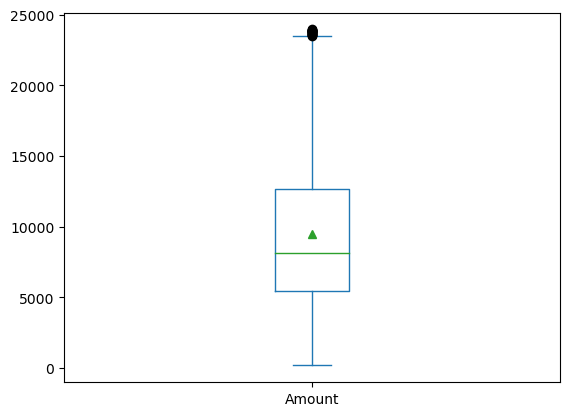

In [11]:
df.plot(kind="box", y="Amount", showmeans=True)

Since mean>median here, it can be said that it is a right-skewed(positively skewed) data distribtution.
Also, as this distribution has outliers, its null values should be filled with median value

In [12]:
df.fillna(df["Amount"].median(), inplace=True)

In [13]:
df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

Now the data does not have any null values and analysis will now produce accurate results.

# Exploratory Data Analysis
## Univariate Analysis:

In [14]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

### Gender-wise

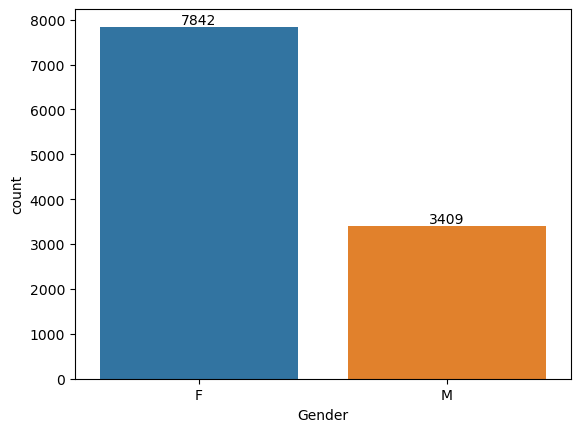

In [15]:
gc = sns.countplot(data=df, x="Gender")

for i in gc.containers:
    gc.bar_label(i)

In [16]:
gc_amt= df.groupby("Gender").agg({"Amount":"sum"}).reset_index()
gc_amt


,Gender,Amount
0,F,74416946.43
1,M,31929494.00


<AxesSubplot:xlabel='Gender', ylabel='Amount'>

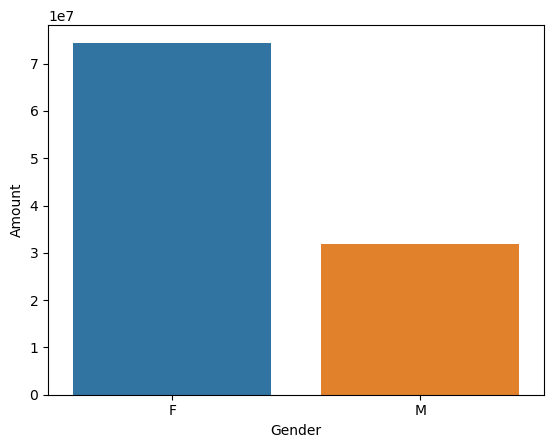

In [17]:
sns.barplot(data=gc_amt, x="Gender", y="Amount")

From above visuals, it can be concluded that female customers made more number of purchaes and also the amount spent by them was more than that by males.

### Age-wise

<AxesSubplot:xlabel='Age Group', ylabel='count'>

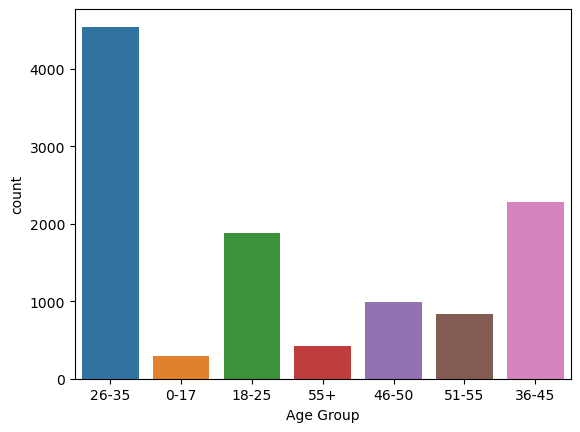

In [18]:
sns.countplot(data=df, x= "Age Group")

From the above bar graph, it can be seen that the adult age group combining of 26-45 was the most among all shoppers.

### Region-wise

In [19]:
state_sales= df.groupby("State").agg({"Orders":"sum"}).reset_index().sort_values(by="Orders", ascending=False).head(5)

In [20]:
state_sales.head()

,State,Orders
14,Uttar Pradesh,4813
10,Maharashtra,3811
7,Karnataka,3241
2,Delhi,2744
9,Madhya Pradesh,2259


<AxesSubplot:xlabel='State', ylabel='Orders'>

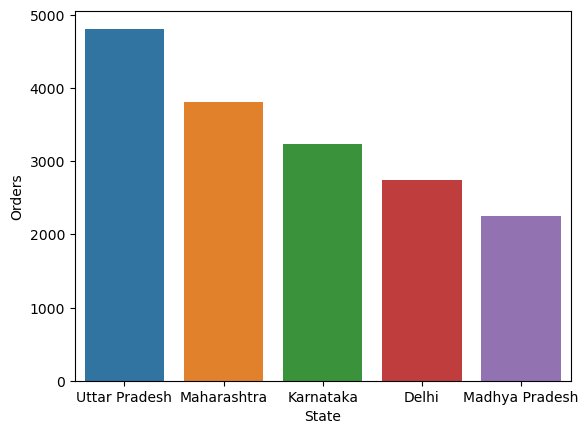

In [21]:
sns.barplot(data=state_sales, x="State", y="Orders")

From the above figure, it can be said that most purchasing was done by customers from "Uttar Pradesh"

### Marital Status wise

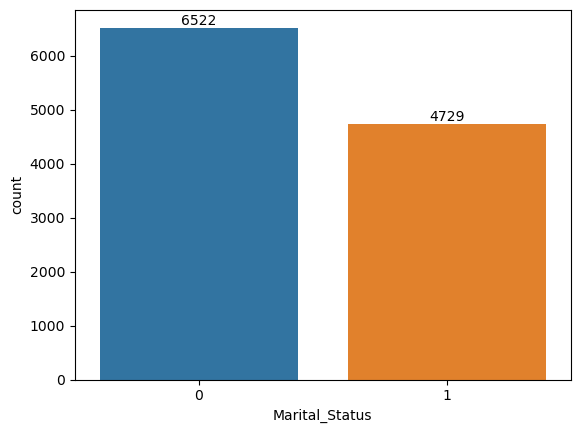

In [22]:
ms = sns.countplot(data=df, x="Marital_Status")

for i in ms.containers:
    ms.bar_label(i)

Unmarried people were seen more then married people

### Occupation-wise

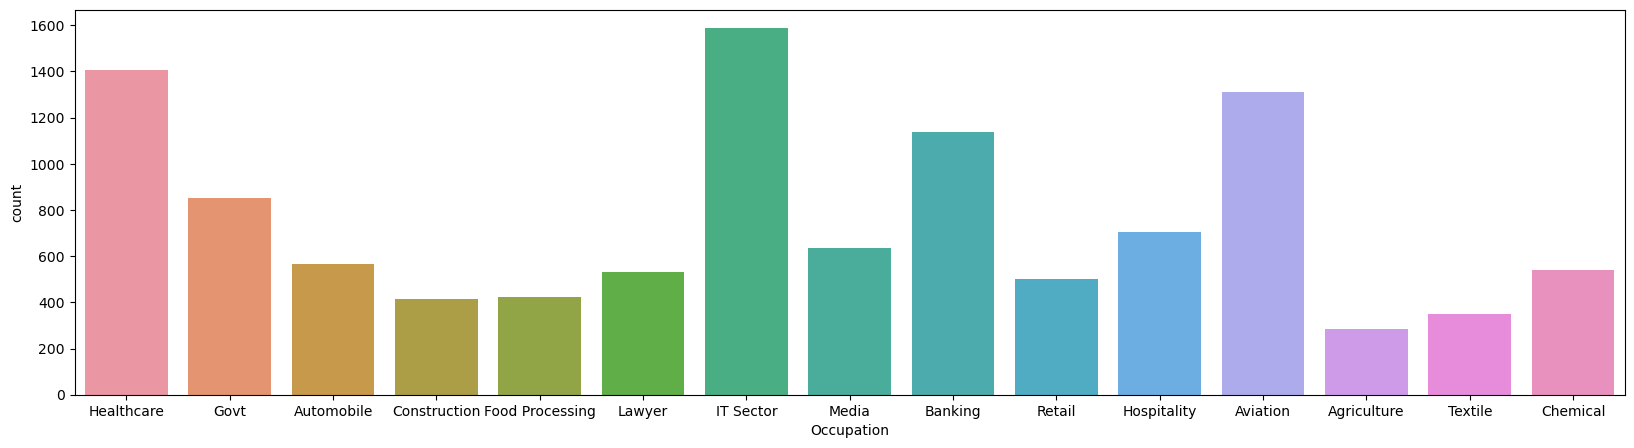

In [23]:
plt.figure(figsize=(20,5))

oc = sns.countplot(data=df, x="Occupation")

plt.show()

for i in oc.containers:
    oc.bar_label(i)


<AxesSubplot:xlabel='Occupation'>

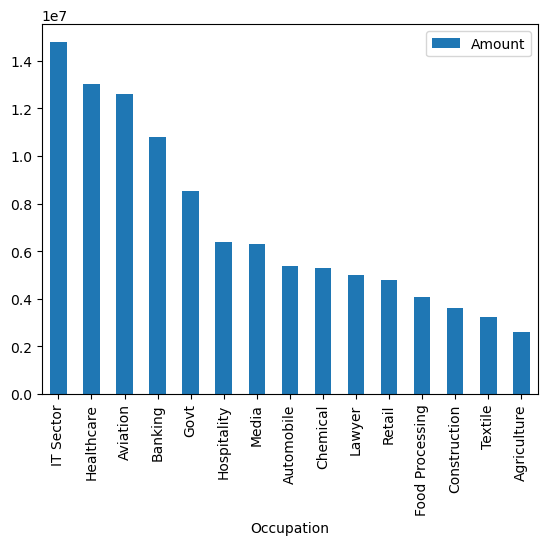

In [24]:
oc_1=df.groupby("Occupation").agg({"Amount":"sum"}).sort_values(by="Amount", ascending=False)
oc_1.plot(kind="bar")

In the above figures, most customers were from "IT Sector" and most spending was also also done by "IT Sectot"

### Product Category

<AxesSubplot:xlabel='Product_Category', ylabel='count'>

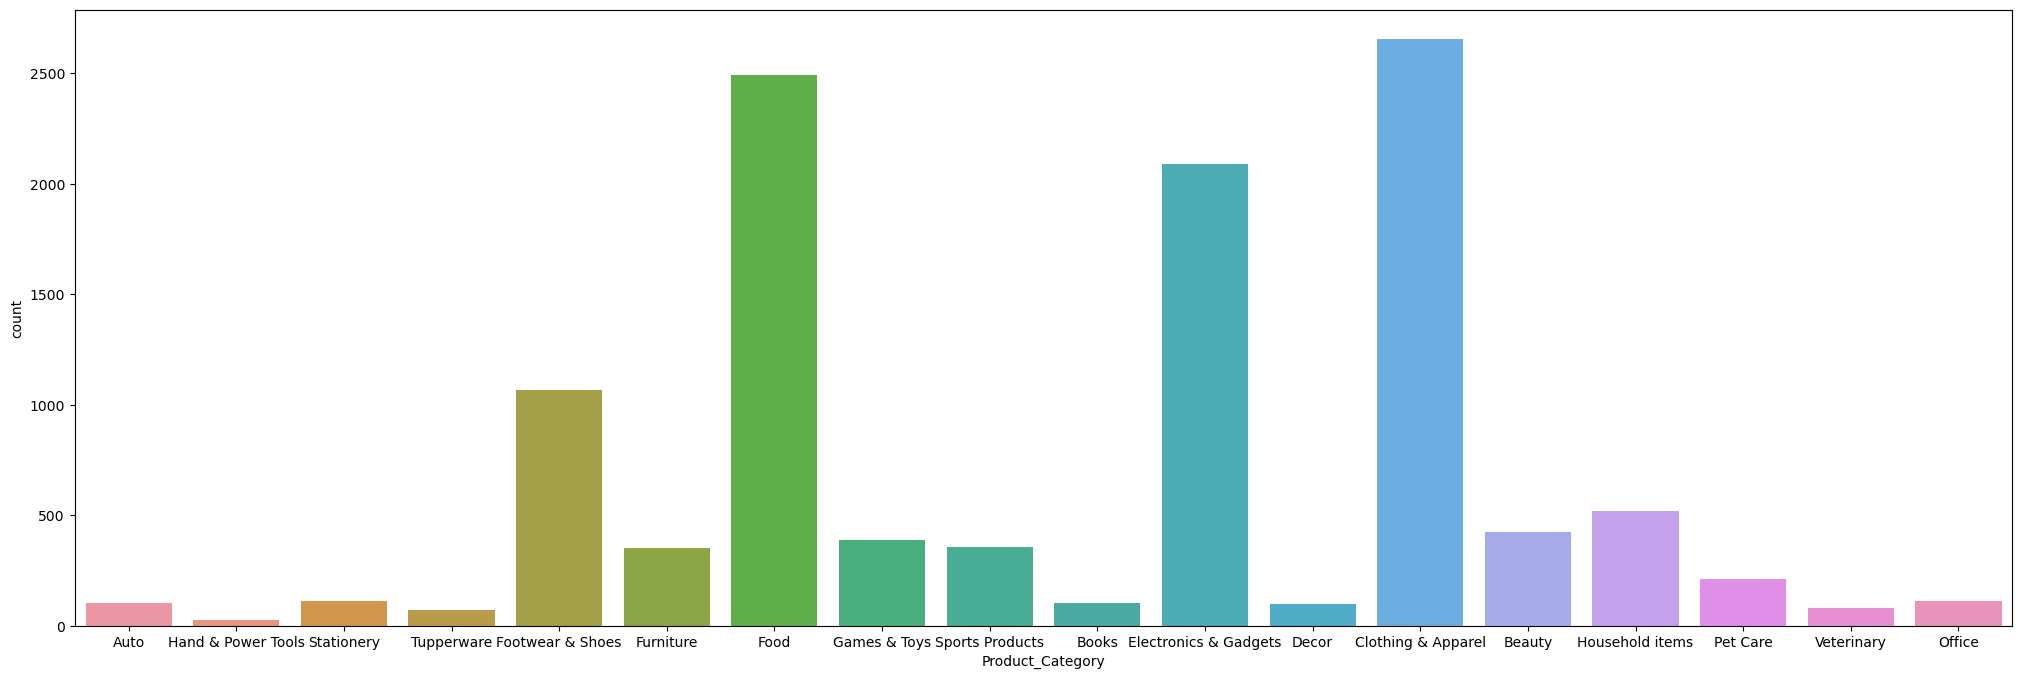

In [25]:
plt.figure(figsize=(25,8))

sns.countplot(data=df, x="Product_Category")

In [26]:
df1=df.groupby("Product_Category").agg({"Amount":"sum"}).reset_index().sort_values(by="Amount", ascending=False).head(10)

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

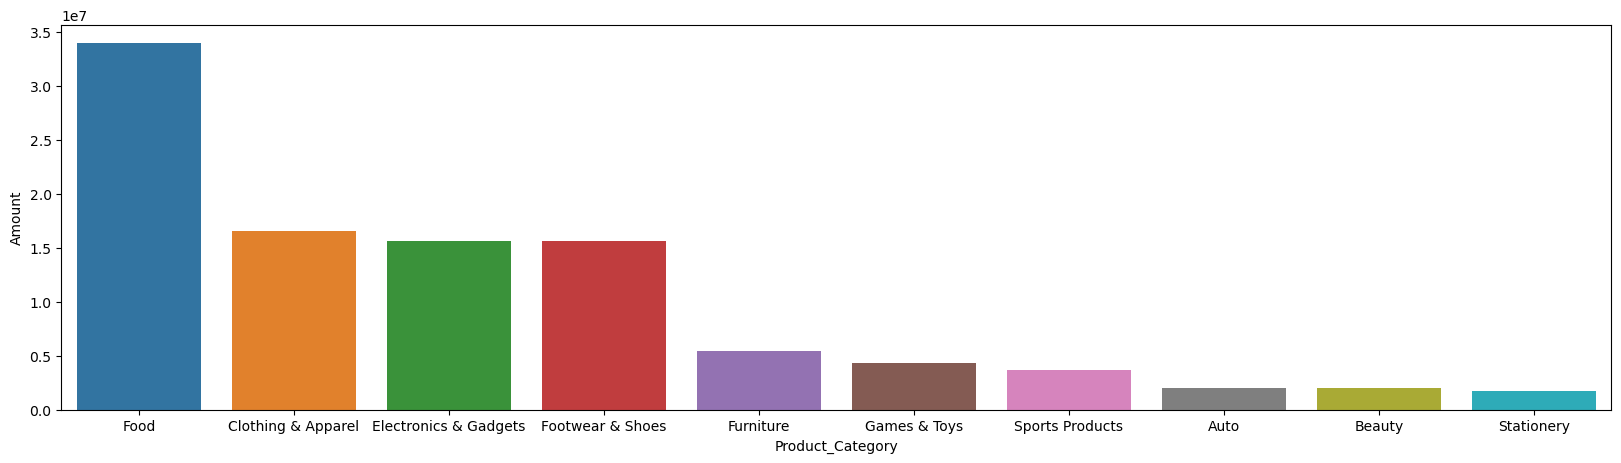

In [27]:
plt.figure(figsize=(20,5))
sns.barplot(data=df1, x="Product_Category", y="Amount")

Here, it is seen that although most purchases were done in "Clothing and Apparel" category, the most amount was spent in "Food" category

## Bivariate Analysis:

### Zone-wise spendings

<AxesSubplot:xlabel='Zone', ylabel='Amount'>

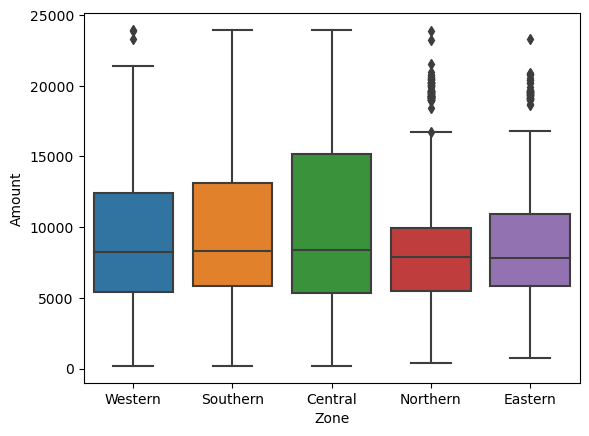

In [28]:
sns.boxplot(data=df, y="Amount", x="Zone")

This Bivariate comparison shows total "Amount" spent in respeective "Zone"

### Gender-wise Occupation

<AxesSubplot:xlabel='Age', ylabel='Amount'>

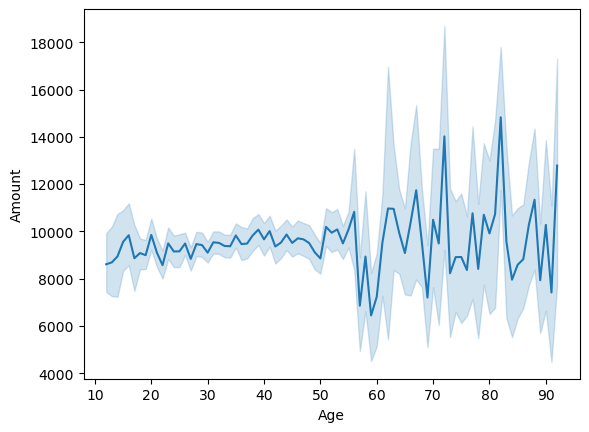

In [29]:
sns.lineplot(data=df, y="Amount", x="Age")

This line graph shows that age<50 customers spent amount in a range and followed a pattern, whereas age>50 customers did not follow such trend

### Age-wise spendings 

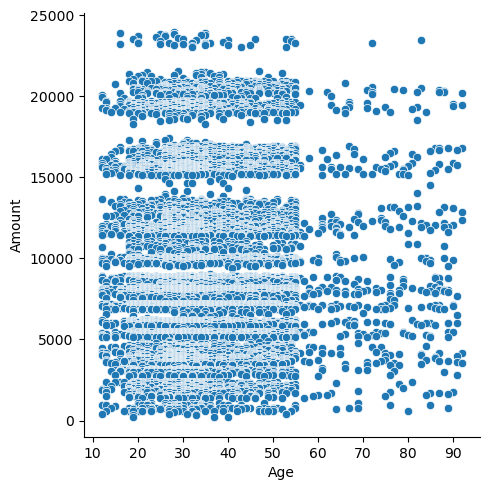

In [30]:
sns.relplot(data=df, x="Age", y="Amount")

The Scatter plot shows that customers with age > 55 had lesser footfall in the store 

## Multivariate Analysis

In [31]:
df1=df.pivot_table(index="Zone",columns="Age Group", values="Orders", aggfunc="count")
df1

Age Group,0-17,18-25,26-35,36-45,46-50,51-55,55+
Zone,,,,,,,
Central,105,685,1710,905,403,316,172
Eastern,26,127,321,171,76,65,28
Northern,40,256,608,297,119,123,48
Southern,62,456,1094,562,239,185,97
Western,63,355,810,351,150,143,83


<AxesSubplot:xlabel='Age Group', ylabel='Zone'>

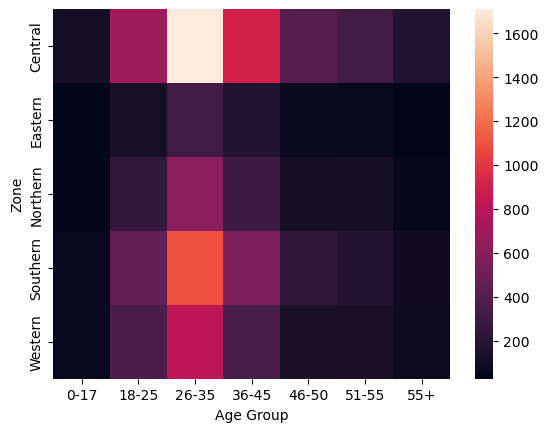

In [32]:
sns.heatmap(df1)

This Heatmap shows that number of orders done does not vary much from "Zone", but it is dependent on "Age Group"